## Made to see difference between rean and satellite data, for whole period, whole area

### Laget 18/3, path + data hentet fra remote

In [23]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy as ccrs
import numpy as np
import plot_timeseries as pt
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
path = '/Users/johannemehren/Desktop/filer/'

ds1 = xr.open_dataset(path + 'gridfile_test.nc')
ds2 = xr.open_dataset(path + 'erai_regrid_5x5.nc')

obs = xr.open_dataset(path + 'GPS-RO__CP_LR_5x5_2007-2018.nc')

In [26]:
obs_res = obs.resample(time='M').mean()
obs_res['time'] = ds1.time

In [27]:
ds2_sliced = ds2.sel(time=slice('2007-01-01', '2018-12-31'))
ds2_sliced['time'] = ds1.time

In [28]:
diff_ctpt_era5 = ds1.ctpt.mean(axis=(1,2)) - obs_res.CP_T.mean(axis=(1,2))
diff_lrt_era5 = ds1.tpt.mean(axis=(1,2)) - obs_res.LR_T.mean(axis=(1,2))


diff_ctpt_erai = ds2_sliced.ctpt.sel(lat=slice(-30,30)).mean(axis=(1,2)) - obs_res.CP_T.sel(lat=slice(-30,30)).mean(axis=(1,2))
diff_lrt_erai = ds2_sliced.tpt.sel(lat=slice(-30,30)).mean(axis=(1,2)) - obs_res.LR_T.sel(lat=slice(-30,30)).mean(axis=(1,2))
#diff_ctpt_era5.mean(axis=(1,2)).plot()

In [29]:
blue1 = 'darkblue'
blue2 = 'cornflowerblue'

org1 = 'darkorange'
org2 = 'orange'

gr1 = 'darkgreen'
gr2 = 'limegreen'

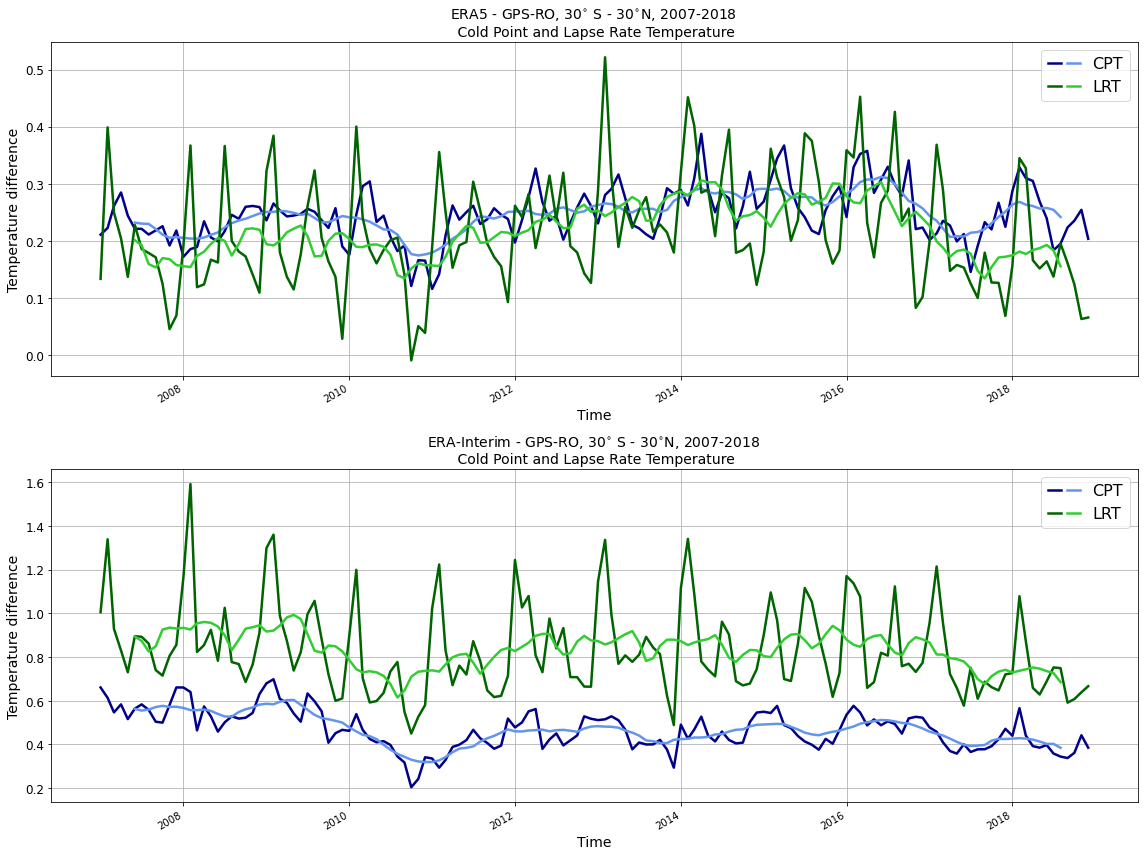

In [50]:
fig, axs = plt.subplots(2,1, figsize=(16,12))

p1, = diff_ctpt_era5.plot(ax=axs[0], lw = 2.5, color = blue1)
p2, = diff_ctpt_era5.rolling(time=10, center=True).mean().plot(ax=axs[0], 
                                                        lw = 2.5, color=blue2 )
p3, = diff_lrt_era5.plot(ax=axs[0], lw = 2.5, color = gr1)
p4, = diff_lrt_era5.rolling(time=10, center=True).mean().plot(ax=axs[0], lw = 2.5, color = gr2)
axs[0].set_title('ERA5 - GPS-RO, 30$^{\circ}$ S - 30$^{\circ}$N, 2007-2018 \n Cold Point and Lapse Rate Temperature',
                fontsize=14)

p5, = diff_ctpt_erai.plot(ax=axs[1],lw = 2.5, color = blue1)
p6, = diff_ctpt_erai.rolling(time=10, center=True).mean().plot(ax=axs[1], lw = 2.5, color = blue2)
p7, = diff_lrt_erai.plot(ax=axs[1], lw = 2.5, color = gr1)
p8, = diff_lrt_erai.rolling(time=10, center=True).mean().plot(ax=axs[1], lw = 2.5, color = gr2)
axs[1].set_title('ERA-Interim - GPS-RO, 30$^{\circ}$ S - 30$^{\circ}$N, 2007-2018 \n Cold Point and Lapse Rate Temperature',
                fontsize=14)


l = axs[0].legend([(p1, p2), (p3,p4)], ['CPT', 'LRT'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16)
l2 = axs[1].legend([(p5, p6), (p7,p8)], ['CPT', 'LRT'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16)


for ax in axs:
    #ax.legend(ncol = 2, fontsize=12)
    ax.grid()
    ax.set_ylabel('Temperature difference', fontsize=14)
    ax.set_xlabel('Time', fontsize=14)
    ax.tick_params(axis="y", labelsize=12) 
    
plt.tight_layout()
#fig.savefig('fig/timeseries_era5-erai-gpsro_3030_cpt-lrt.png')

In [49]:
diff2_ctpt_era5 = ds1.ctpt.sel(lat=slice(-20,20)).mean(axis=(1,2)) - obs_res.CP_T.sel(lat=slice(-20,20)).mean(axis=(1,2))
diff2_lrt_era5 = ds1.tpt.sel(lat=slice(-20,20)).mean(axis=(1,2)) - obs_res.LR_T.sel(lat=slice(-20,20)).mean(axis=(1,2))


diff2_ctpt_erai = ds2_sliced.ctpt.sel(lat=slice(-20,20)).mean(axis=(1,2)) - obs_res.CP_T.sel(lat=slice(-20,20)).mean(axis=(1,2))
diff2_lrt_erai = ds2_sliced.tpt.sel(lat=slice(-20,20)).mean(axis=(1,2)) - obs_res.LR_T.sel(lat=slice(-20,20)).mean(axis=(1,2))

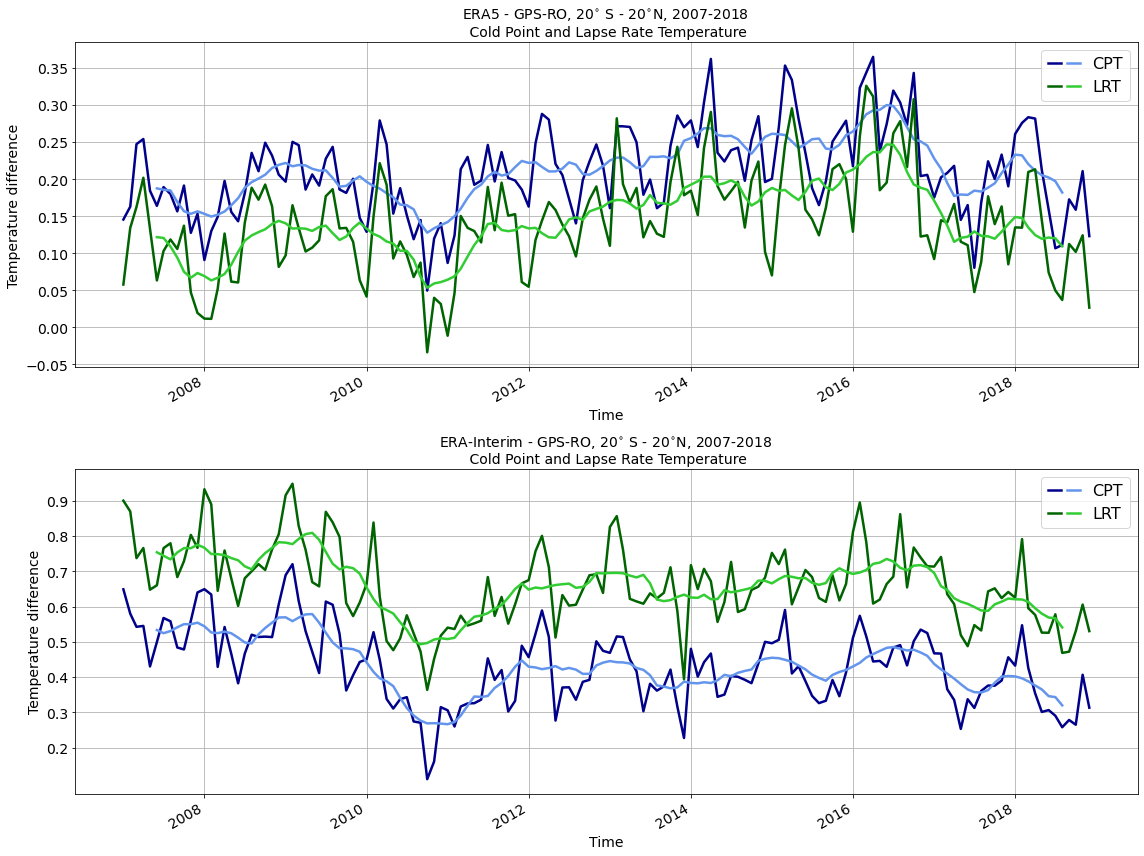

In [62]:
fig, axs = plt.subplots(2,1, figsize=(16,12))

p1, =diff2_ctpt_era5.plot(ax=axs[0],  lw=2.5, color = blue1)
p2, = diff2_ctpt_era5.rolling(time=10, center=True).mean().plot(ax=axs[0], lw=2.5, color = blue2)
p3, = diff2_lrt_era5.plot(ax=axs[0], lw=2.5, color=gr1)
p4, = diff2_lrt_era5.rolling(time=10, center=True).mean().plot(ax=axs[0], lw=2.5, color=gr2)
axs[0].set_title('ERA5 - GPS-RO, 20$^{\circ}$ S - 20$^{\circ}$N, 2007-2018 \n Cold Point and Lapse Rate Temperature',
                fontsize=14)

p5, = diff2_ctpt_erai.plot(ax=axs[1], color = blue1, lw=2.5)
p6, = diff2_ctpt_erai.rolling(time=10, center=True).mean().plot(ax=axs[1], color=blue2, lw=2.5)
p7, = diff2_lrt_erai.plot(ax=axs[1], color=gr1, lw=2.5)
p8, = diff2_lrt_erai.rolling(time=10, center=True).mean().plot(ax=axs[1], color=gr2, lw=2.5)
axs[1].set_title('ERA-Interim - GPS-RO, 20$^{\circ}$ S - 20$^{\circ}$N, 2007-2018 \n Cold Point and Lapse Rate Temperature',
                fontsize=14)

l = axs[0].legend([(p1, p2), (p3,p4)], ['CPT', 'LRT'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16)
l2 = axs[1].legend([(p5, p6), (p7,p8)], ['CPT', 'LRT'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16)
axs[1].set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

for ax in axs:
    ax.grid()
    ax.set_ylabel('Temperature difference', fontsize=14)
    ax.set_xlabel('Time', fontsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.tick_params(axis="x", labelsize=14)
    
plt.tight_layout()
#fig.savefig('fig/timeseries_era5-erai-gpsro_2020_cpt-lrt.png')

In [10]:
diff3_ctpt_era5 = ds1.ctpt.sel(lat=slice(-10,10)).mean(axis=(1,2)) - obs_res.CP_T.sel(lat=slice(-10,10)).mean(axis=(1,2))
diff3_lrt_era5 = ds1.tpt.sel(lat=slice(-10,10)).mean(axis=(1,2)) - obs_res.LR_T.sel(lat=slice(-10,10)).mean(axis=(1,2))


diff3_ctpt_erai = ds2_sliced.ctpt.sel(lat=slice(-10,10)).mean(axis=(1,2)) - obs_res.CP_T.sel(lat=slice(-10,10)).mean(axis=(1,2))
diff3_lrt_erai = ds2_sliced.tpt.sel(lat=slice(-10,10)).mean(axis=(1,2)) - obs_res.LR_T.sel(lat=slice(-10,10)).mean(axis=(1,2))

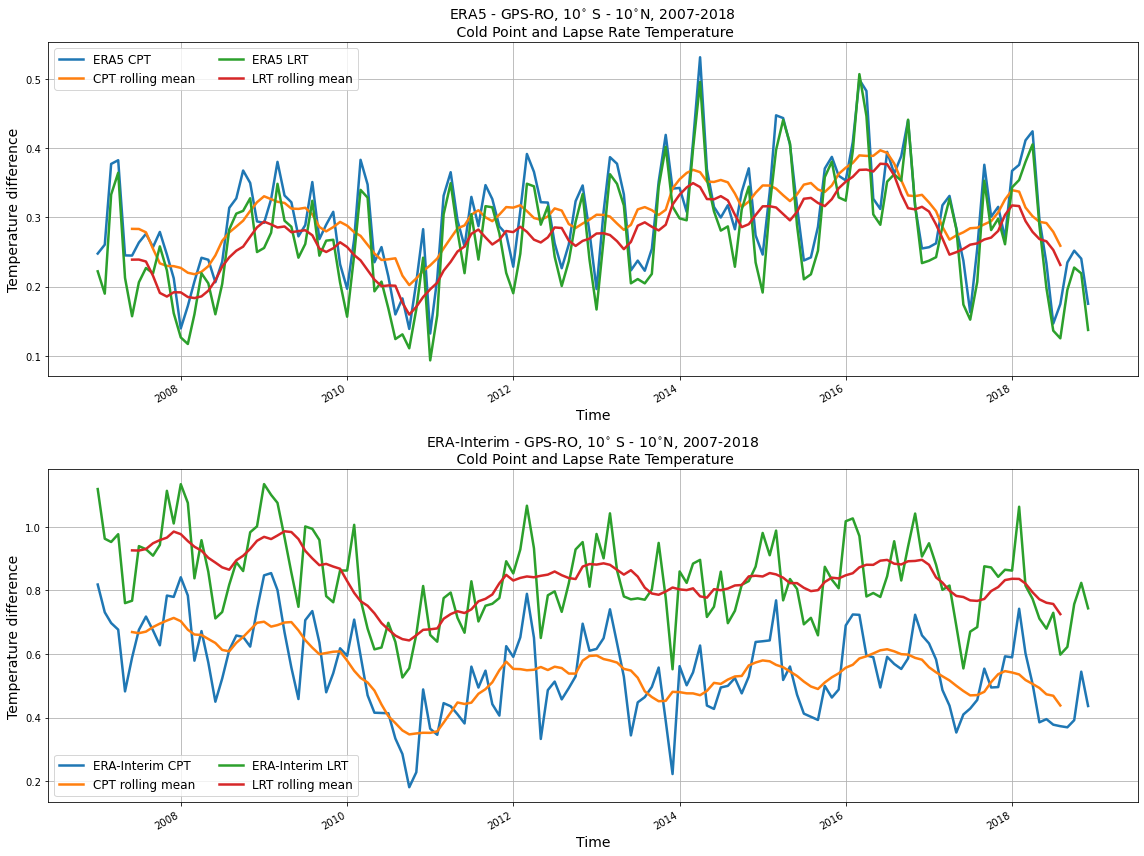

In [11]:
fig, axs = plt.subplots(2,1, figsize=(16,12))

diff3_ctpt_era5.plot(ax=axs[0], label = 'ERA5 CPT', lw=2.5)
diff3_ctpt_era5.rolling(time=10, center=True).mean().plot(ax=axs[0], label = 'CPT rolling mean', lw=2.5)
diff3_lrt_era5.plot(ax=axs[0], label = 'ERA5 LRT', lw=2.5)
diff3_lrt_era5.rolling(time=10, center=True).mean().plot(ax=axs[0], label = 'LRT rolling mean', lw=2.5)
axs[0].set_title('ERA5 - GPS-RO, 10$^{\circ}$ S - 10$^{\circ}$N, 2007-2018 \n Cold Point and Lapse Rate Temperature',
                fontsize=14)

diff3_ctpt_erai.plot(ax=axs[1], label = 'ERA-Interim CPT', lw=2.5)
diff3_ctpt_erai.rolling(time=10, center=True).mean().plot(ax=axs[1], label='CPT rolling mean', lw=2.5)
diff3_lrt_erai.plot(ax=axs[1], label = 'ERA-Interim LRT', lw=2.5)
diff3_lrt_erai.rolling(time=10, center=True).mean().plot(ax=axs[1], label='LRT rolling mean', lw=2.5)
axs[1].set_title('ERA-Interim - GPS-RO, 10$^{\circ}$ S - 10$^{\circ}$N, 2007-2018 \n Cold Point and Lapse Rate Temperature',
                fontsize=14)


for ax in axs:
    ax.legend(ncol = 2, fontsize=12)
    ax.grid()
    ax.set_ylabel('Temperature difference', fontsize=14)
    ax.set_xlabel('Time', fontsize=14)
    
plt.tight_layout()
#fig.savefig('fig/timeseries_era5-erai-gpsro_1010_cpt-lrt.png')